<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/analysis/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/timesler/facenet-pytorch

In [ ]:
!pip install facenet-pytorch

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
device = "cuda"
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [ ]:
x = Image.open("woman.jpeg")
x_aligned, prob = mtcnn(x, return_prob=True)
if x_aligned is not None:
  print('Face detected with probability: {:8f}'.format(prob))

In [ ]:
x_aligned.shape

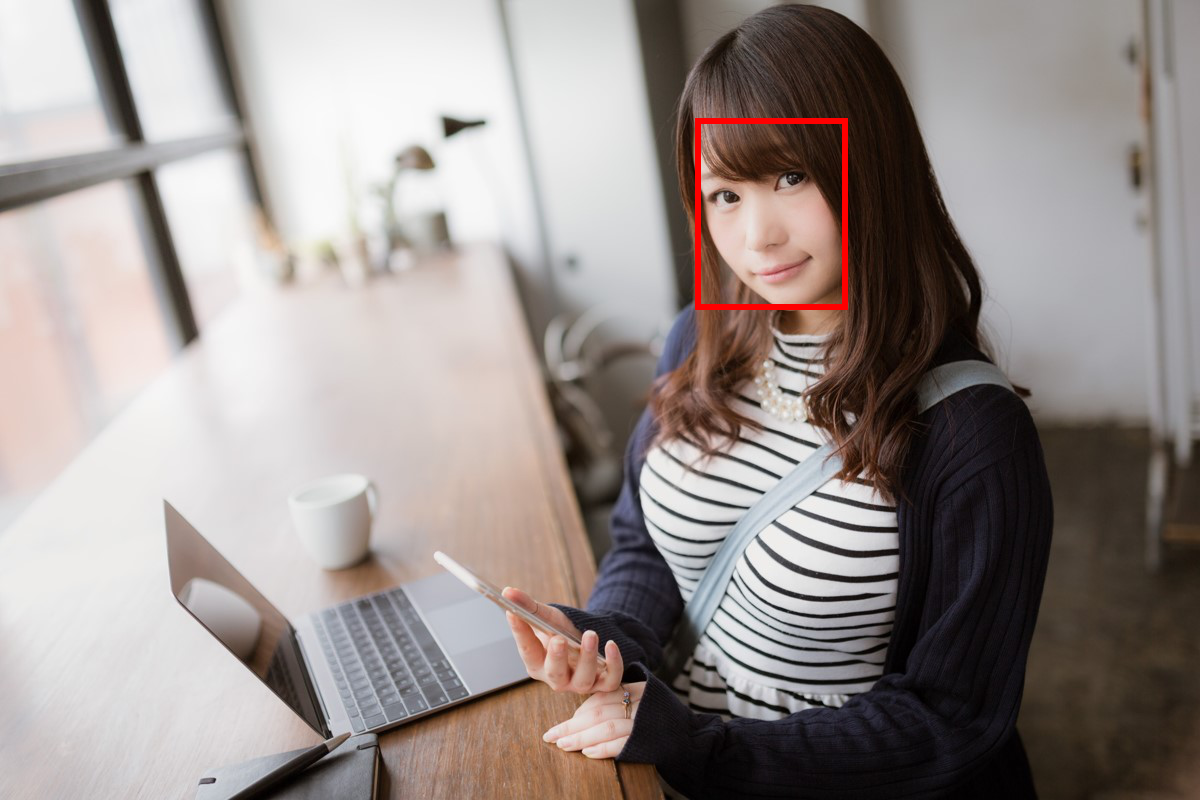

In [5]:
#@title detect
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image, ImageDraw

mtcnn = MTCNN(keep_all=True, device=device)
frame = Image.open("woman.jpeg")
boxes, _ = mtcnn.detect(frame)
    
# Draw faces
frame_draw = frame.copy()
draw = ImageDraw.Draw(frame_draw)
for box in boxes:
      draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

frame_draw.resize((640, 360))
display(frame_draw)